# Stephen Lennox

## Research question/interests
### **What is the best place to live in provincial capital cities based the housing index of the last year?**

I am very interested in the current housing markets in Canada. I am currently enrolled in the co-op program and due to a general lack of success on my remote/local job hunt, I am forced to look outside of the province at on-site positions to fufill my co-op graduation requirements. That means that in other provinces like Alberta, Quebec and Ontario: I need to know what the status of housing is and where in order to make informed financial choices on where I potentially move to. My research question is: **What is the best place to live in provincial capital cities based off of the housing index and quality of the housing market in the last year?**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
def load_and_process(url):
    df = (pd.read_csv(url)
    .dropna(subset="VALUE")
      .rename(columns={'GEO':'LOCATION', 'REF_DATE':'DATE', 'New housing price indexes': 'House/land'})
    .drop(columns=["DGUID", "UOM", "UOM_ID", "SCALAR_ID","SCALAR_FACTOR", "COORDINATE", 'TERMINATED', 'SYMBOL', 'STATUS', 'DECIMALS', 'VECTOR'])
     .loc[lambda x: x['House/land'].str.contains('House only')]
      .drop(columns=['House/land'])
      .assign(St_JOHNS = lambda x: x.VALUE.where(x.LOCATION.str.contains("St. John's")), 
              QUEBEC = lambda x: x.VALUE.where(x.LOCATION.str.contains("Quebec")),
              OTTAWA = lambda x: x.VALUE.where(x.LOCATION.str.contains("Ottawa")),
              VICTORIA = lambda x: x.VALUE.where(x.LOCATION.str.contains("Victoria")),
              REGINA = lambda x: x.VALUE.where(x.LOCATION.str.contains("Regina")),
              EDMONTON = lambda x: x.VALUE.where(x.LOCATION.str.contains("Edmonton")),
              HALIFAX = lambda x: x.VALUE.where(x.LOCATION.str.contains("Halifax"))
             )
      .drop(columns='VALUE')
      .groupby('DATE')[['St_JOHNS', 'QUEBEC', 'OTTAWA', 'VICTORIA', 'REGINA', 'EDMONTON', 'HALIFAX']].first().reset_index()
     )
    return df

In [3]:
df_index=load_and_process('../data/raw/Montly Data/Montly-index.csv')
df_quality = pd.read_csv("../data/raw/Quality Long-Form Data/Housing-quality.csv")

### Get all of the major capital cities' data

In [4]:
df_index

,DATE,St_JOHNS,QUEBEC,OTTAWA,VICTORIA,REGINA,EDMONTON,HALIFAX
0,1981-01,37.5,34.9,30.8,206.8,20.7,36.5,NaN
1,1981-02,37.5,35.4,30.8,209.1,21.2,36.8,NaN
2,1981-03,37.5,35.4,31.9,210.6,21.5,36.8,NaN
3,1981-04,37.5,35.7,32.0,210.6,22.4,36.9,NaN
4,1981-05,37.7,36.1,32.7,212.4,23.1,38.2,NaN
...,...,...,...,...,...,...,...,...
499,2022-08,107.4,149.1,120.5,132.1,103.1,113.4,127.5
500,2022-09,108.1,149.0,120.5,132.1,103.0,113.5,127.5
501,2022-10,108.1,149.7,120.5,131.9,102.6,112.6,127.5
502,2022-11,108.1,149.2,120.5,131.9,102.6,112.1,127.5


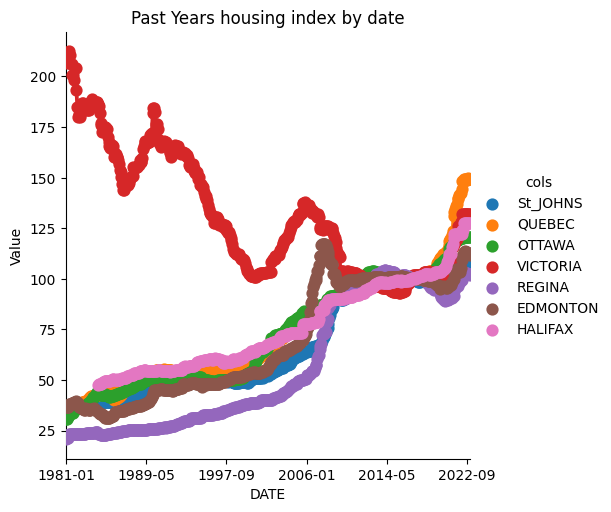

In [31]:
dfm = df_index.melt('DATE', var_name='cols', value_name='vals')
plt=sns.catplot(x="DATE", y="vals", hue='cols', data=dfm, kind='point')
plt.set(title="Past Years housing index by date",xlabel='DATE', ylabel='Value', xticks=np.arange(0,503,100))

### Exploratory Data from the last 12 months

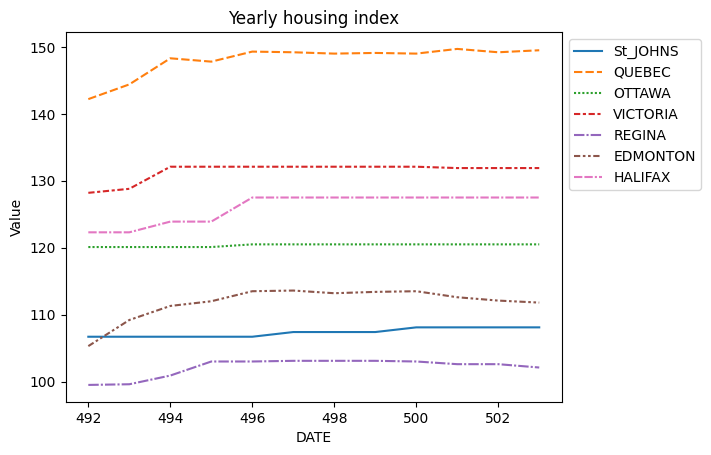

In [6]:
plt=sns.lineplot(df_index[-12:])
plt.set(title='Yearly housing index',xlabel='DATE', ylabel='Value')
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

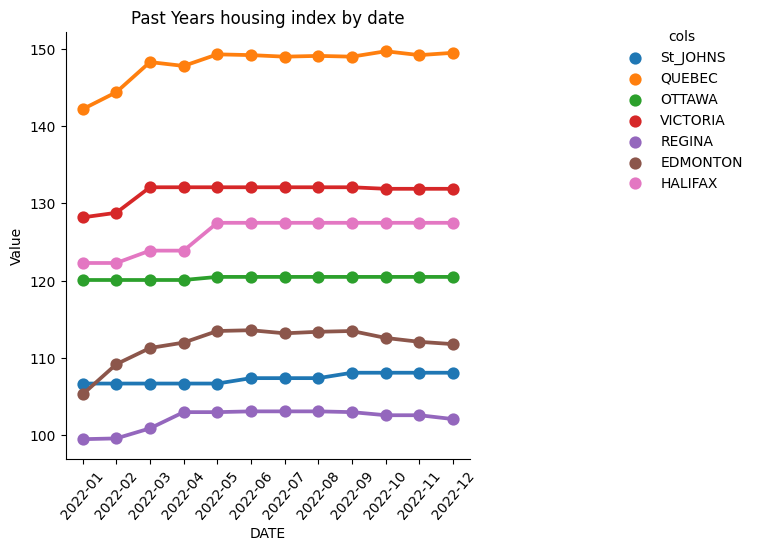

In [11]:
dfm = df_index[-12:].melt('DATE', var_name='cols', value_name='vals')
plt=sns.catplot(x="DATE", y="vals", hue='cols', data=dfm, kind='point')
plt.set(title="Past Years housing index by date",xlabel='DATE', ylabel='Value')
plt.tick_params(axis='x', rotation=50)
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

### Explore the second dataset

[Text(0.5, 1.0, 'Non-response rate per area'),
 Text(0, 0.5, 'Non-response rate'),
 Text(0.5, 0, 'Location')]

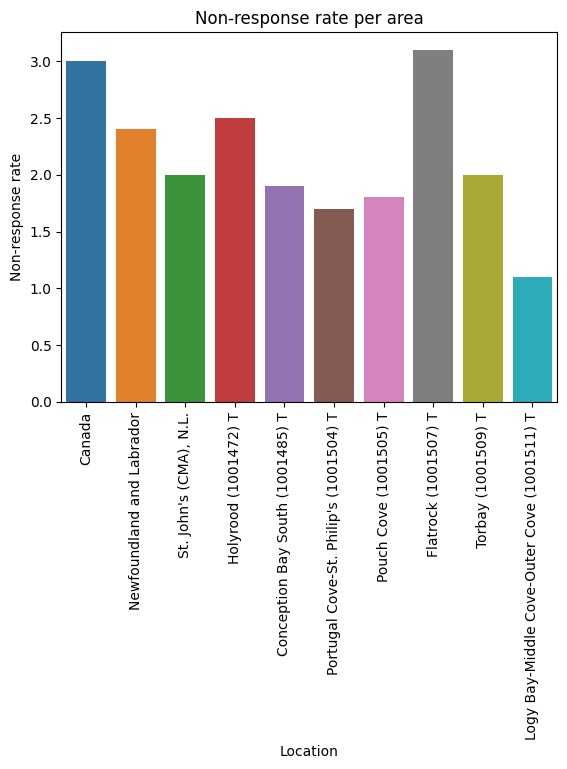

In [8]:
data_explore2 =df_quality.drop(columns=["DGUID", "Symbol.17", "Symbol.16", "Symbol.18", "Symbol.19", "Symbol.15", "Symbol.14", "Symbol.13", "Symbol.12", "Symbol.11", "Symbol.10", "Symbol.9", "Symbol.8", "Symbol.7", "Symbol.6", "Symbol.5", "Symbol.4", "Symbol.3", "Symbol.2", "Symbol.1", "Symbol"])
colnames= [item for item in data_explore2.columns if "Non-response rate" in item]
colnames.append("GEO")
data_explore2["GEO"]
filtered=data_explore2[colnames]
plt_quality=sns.barplot(filtered.iloc[:10], y="Long-form data quality indicators – Housing characteristics (20):Tenure - Non-response rate[1]",x= "GEO")
plt_quality.tick_params(axis='x', rotation=90, which='major')
plt_quality.set(title="Non-response rate per area", ylabel='Non-response rate', xlabel='Location')